# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ex">Explantory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

the dataset about go ford bike trip it contions the duration of each trip the start time the end time the birth year of users and if they customers or subscriber we are gonna load the data make insights and trying to solve this three quatsions

When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the avrage trip depend on if a user is a subscriber or customer?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#check the duplicates
df.duplicated().value_counts()

False    183412
dtype: int64

In [5]:
#look at difrenet values in each column
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
df[['duration_sec','member_birth_year']].describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [7]:
df.duration_sec.sort_values(ascending=False).head(20)

101361    85444
85465     84548
153705    83772
127999    83519
112435    83407
5203      83195
95750     82512
173365    82385
8631      81549
176987    80891
107581    79548
94581     75262
90195     74408
86454     74097
123383    73930
73587     72824
129176    72627
116671    72590
129177    72576
136599    72361
Name: duration_sec, dtype: int64

In [8]:
df.member_birth_year.sort_values().head(20)

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
108314    1900.0
41194     1900.0
110468    1900.0
115637    1900.0
26133     1900.0
107359    1900.0
58222     1900.0
72819     1900.0
102148    1900.0
24042     1900.0
16087     1900.0
60960     1900.0
109010    1900.0
177708    1900.0
162051    1900.0
Name: member_birth_year, dtype: float64

### Data Cleaning 
###### Convert the data type of columns to the correct datatype

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('str')
df['start_station_latitude'] = df['start_station_latitude'].astype('str')
df['start_station_longitude'] = df['start_station_longitude'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['end_station_latitude'] = df['end_station_latitude'].astype('str')
df['end_station_longitude'] = df['end_station_longitude'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

In [10]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                     object
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                            object
user_type                          object
member_birth_year                   Int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### 1-Univariate Exploration

Because of outlires over 15 minutes (the 75% of the data is almost 15 min and max is almost 24 hour )

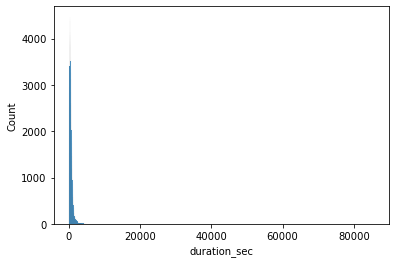

In [12]:
#look to the distrbution of duration
sns.histplot(df['duration_sec'])
plt.show()

we can see the higher is almost etween 6 and 7 minutes in the 75% distrbution

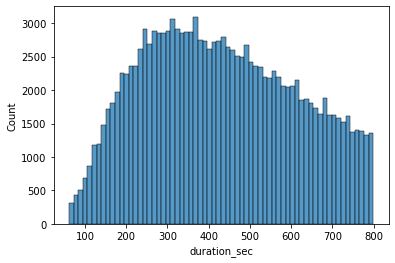

In [13]:
#plot the distrbution of the 75% of the duration
sns.histplot(df[df['duration_sec']<800].duration_sec)
plt.show()

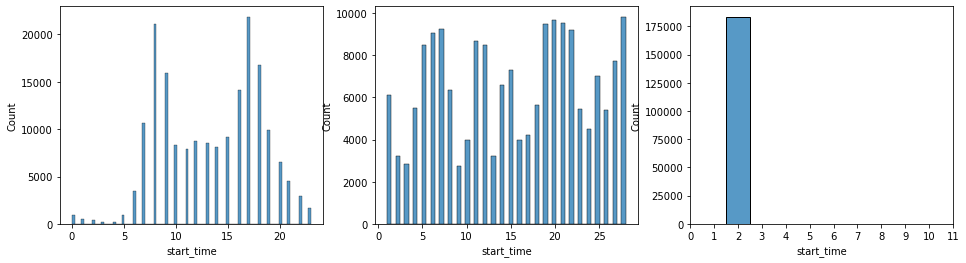

In [58]:
# which days have more users
fig,ax = plt.subplots(1,3,figsize = (16,4))

sns.histplot(ax=ax[0],data=df,x=df['start_time'].dt.hour)
sns.histplot(ax=ax[1],data=df,x=df['start_time'].dt.day)
sns.histplot(ax=ax[2],data=df,x=df['start_time'].dt.month)
plt.xticks(range(12))
plt.show()

we can see over 90% is subscriber users

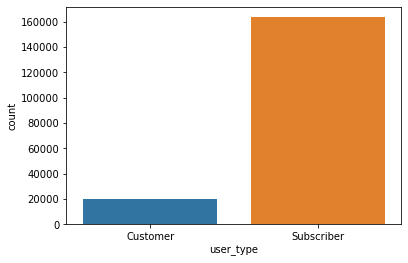

In [15]:
#which user type is higher
sns.countplot(data = df,x='user_type');

becuse of outliers fail before 1940 we can see it's foucs on 80s and 90s genration

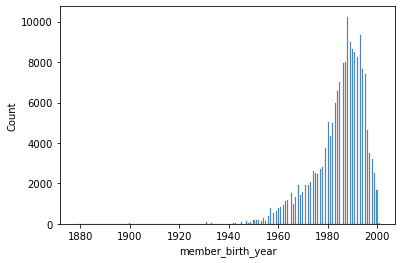

In [16]:
#which genration is take in ride a bike
sns.histplot(df['member_birth_year']);

we can notice the users from 1985 to 1995 is the most

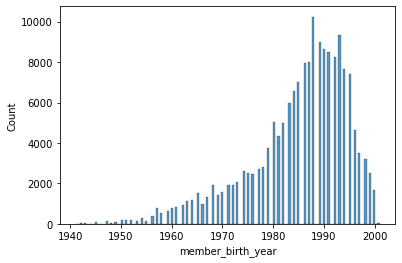

In [17]:
#focus more on people born after 1940
sns.histplot(df[df['member_birth_year']>1940].member_birth_year);

over 75% is male 

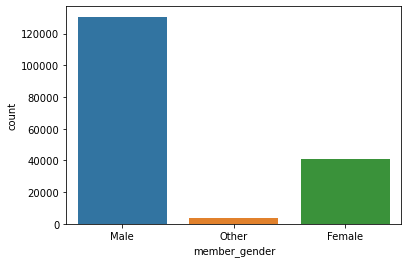

In [18]:
# count which gender is take in most ride a bike
sns.countplot(data=df,x='member_gender');

over 90% not enrolled in the Bike Share for All program

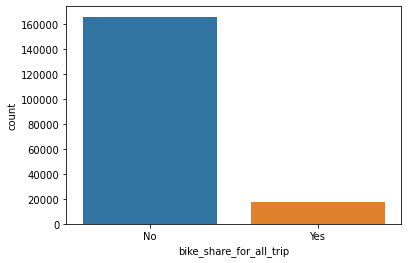

In [19]:
# tracks most members who are enrolled in the Bike Share for All program
sns.countplot(data=df,x='bike_share_for_all_trip');

### Bivariate Exploration

2 and 3 O'Cloak have the higher duration on  avrage

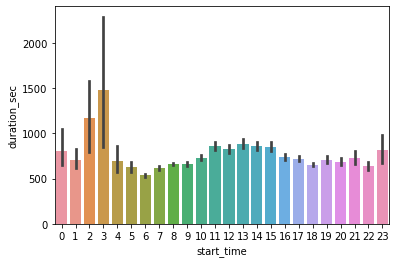

In [20]:
#which hour on the day people take higher duration
sns.barplot(data = df,x=df['start_time'].dt.hour,y='duration_sec');

customer same as more by 50% but lets drop outliers and see

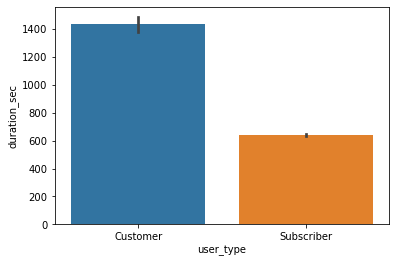

In [21]:
#which is takes more time in users 
sns.barplot(data=df,x='user_type',y='duration_sec');

after droping outliers we can see customer more by just 100 sec 

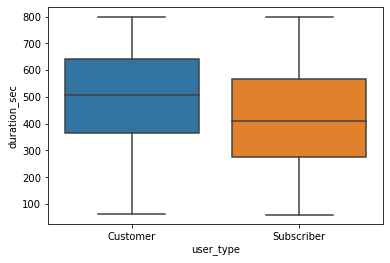

In [22]:
# plot the users for just 800sec duration 
sns.boxplot(x=df['user_type'],y=df[df['duration_sec']<800].duration_sec);

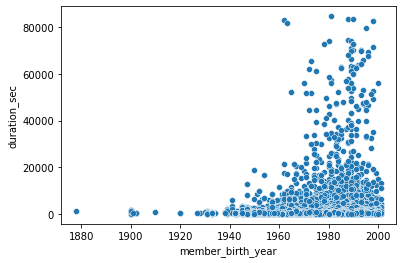

In [23]:
sns.scatterplot(data=df,x='member_birth_year',y='duration_sec');

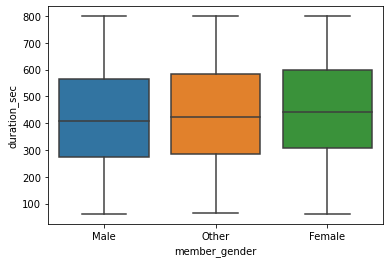

In [24]:
# plot the gender for just 800sec duration 
sns.boxplot(x=df['member_gender'],y=df[df['duration_sec']<800].duration_sec);

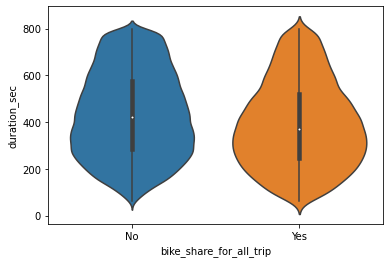

In [25]:
# plot the bike share for just 800sec duration 
sns.violinplot(x=df['bike_share_for_all_trip'],y=df[df['duration_sec']<800].duration_sec);

### Multivariate Exploration

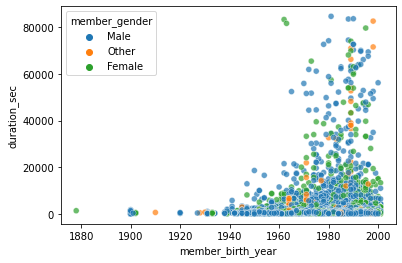

In [26]:
sns.scatterplot(data=df,x='member_birth_year',y='duration_sec',hue='member_gender',alpha=0.7);

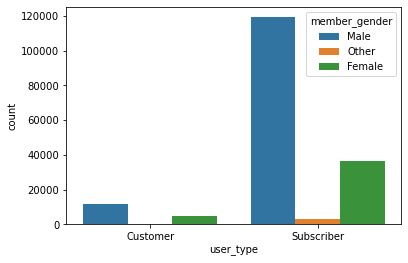

In [27]:
sns.countplot(data=df,x='user_type',hue='member_gender');

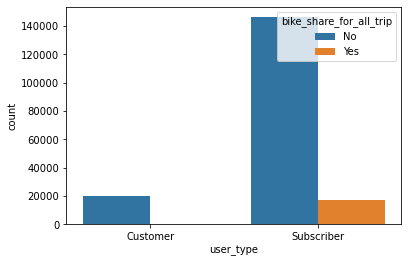

In [28]:
sns.countplot(data=df,x='user_type',hue='bike_share_for_all_trip');

<a id='ex'></a>
### Explantory Data Anaylsis

### Research Question 1: When are most trips taken in terms of time of day, day of the week, or month of the year?

#### By looking at the 3 figures we can see most trips take in 7 O,Cloak and 17 O,Cloak , Thursday is the most day users take in,and all trips take in Febraury month

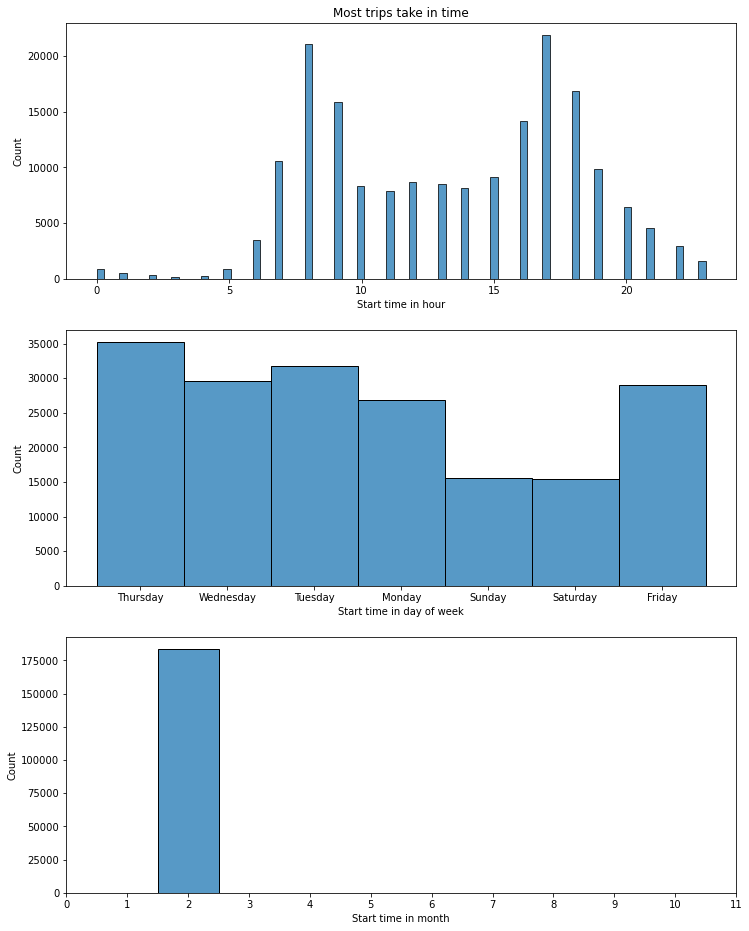

In [99]:
#plot 3 plots one in each row with image size 12 * 16
fig,ax = plt.subplots(3,1,figsize = (12,16))
#plot 3 histgrom for hour ,day and month 
sns.histplot(ax=ax[0],data=df,x=df['start_time'].dt.hour)
sns.histplot(ax=ax[1],data=df,x=df['start_time'].dt.day_name())
sns.histplot(ax=ax[2],data=df,x=df['start_time'].dt.month)
#set title ,ticks and labels for plots
ax[0].set(title='Most trips take in time',xlabel='Start time in hour')
ax[1].set(xlabel='Start time in day of week')
ax[2].set(xticks=(range(12)),xlabel='Start time in month')
plt.show()

### Research Question 2: How long does the average trip take?

#### The avrage time for trip is about 450 sec 

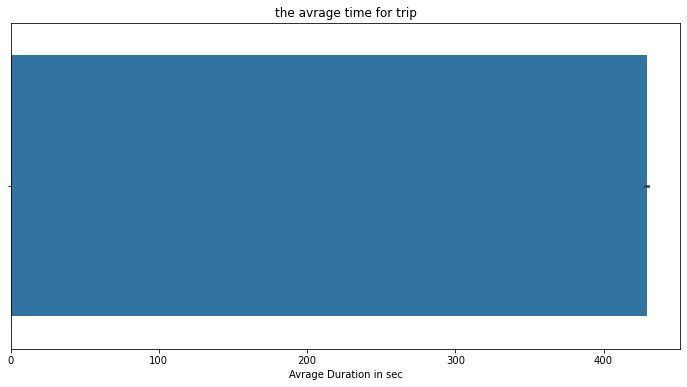

In [108]:
#plot barplot for 75% of the duration sec column
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df[df['duration_sec']<800].duration_sec)
#set title and labels to figure
plt.title('the avrage time for trip')
plt.xlabel('Avrage Duration in sec')
plt.show()

### Research Question 3 :Does the avrage time depend on if a user is a subscriber or customer?

#### As shown in the  figure the diffrance in avrage is just 100 sec for customer 

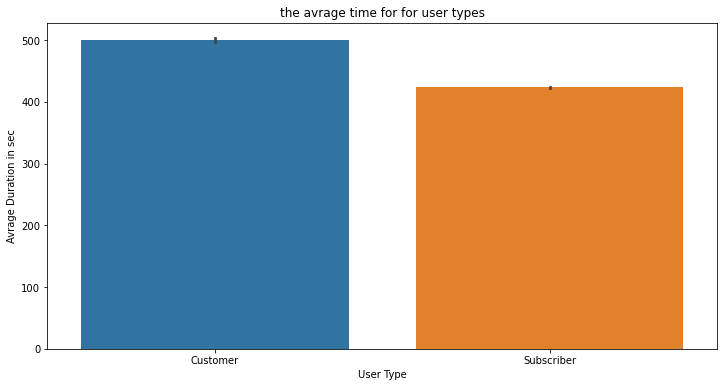

In [109]:
#plot barplot for 75% of the duration sec to user type
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='user_type',y=df[df['duration_sec']<800].duration_sec);
#set title and labels to figure
plt.title('the avrage time for for user types')
plt.xlabel('User Type')
plt.ylabel('Avrage Duration in sec')
plt.show()

<a id='conclusions'></a>
## Conclusions
now we have three important insights about the data ,first we know excatly which time users most take in by hour,day and month 
second the avrage time for each trip and third is the avrage time for customer and subscriber

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

In [112]:
!jupyter nbconvert fordgobike-trip.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook fordgobike-trip.ipynb to slides
[NbConvertApp] Writing 870870 bytes to fordgobike-trip.slides.html
